<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fit-the-Model" data-toc-modified-id="Fit-the-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fit the Model</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
from sklearn import cluster

In [3]:
np.random.seed(20180720)

In [4]:
fair_df = sm.datasets.fair.load_pandas().data

# Without Labels – Clustering

In [5]:
X = fair_df

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## Fit the Model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

CPU times: user 319 ms, sys: 15.3 ms, total: 335 ms
Wall time: 362 ms


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,4.326365,21.662892,2.582753,0.335366,2.371080,13.835656,3.235772,3.465157,0.129205
1,4.033333,31.436275,13.500980,2.230882,2.476471,13.995098,3.434314,4.038235,0.532900
2,3.956843,41.013564,23.000000,3.281751,2.652281,13.794081,3.511714,4.051788,0.369099
3,4.339069,27.764170,3.563259,0.441296,2.351215,15.986842,3.778340,4.121457,0.290924
4,3.971061,27.155413,7.231511,1.390675,2.342980,13.632369,3.278671,3.834941,0.695903
5,3.457143,24.171429,2.528571,0.428571,1.771429,14.371429,3.428571,3.800000,21.628564
6,3.552000,23.096000,3.138000,0.496000,2.088000,13.884000,3.316000,3.432000,5.882292
7,3.934102,38.095552,15.390445,2.480231,2.622735,14.308072,3.515651,4.113674,0.429551


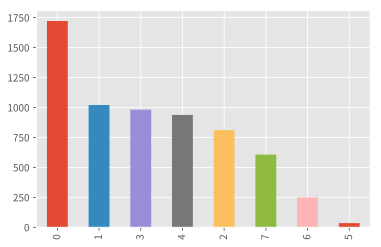

In [6]:
X = fair_df

m = cluster.KMeans()
print(m)
print()

%time m.fit(X)

display(
    X.describe(),
    pd.DataFrame(m.cluster_centers_, columns=X.columns)
)

(
    pd.Series(m.labels_)
    .groupby(m.labels_)
    .count()
    .sort_values(ascending=False)
    .plot.bar()
)

y_label = m.labels_

## Visualization

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
from sklearn.decomposition import PCA

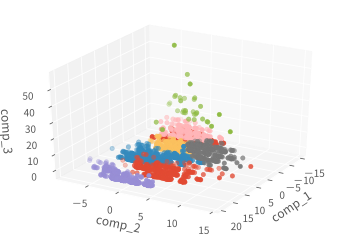

In [9]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
labels = list(range(y_label.min(), y_label.max()+1))

with plt.rc_context({'axes.facecolor': '#FFFFFF'}):

    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('comp_1')
    ax.set_ylabel('comp_2')
    ax.set_zlabel('comp_3')
    
    for i in labels:
        ax.scatter(
            X_pca[y_label == i, 0],
            X_pca[y_label == i, 1],
            X_pca[y_label == i, 2]
        )

    ax.view_init(30, 30)